In [44]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [45]:
os.chdir(os.path.join(os.getcwd(), '../data_final'))
files = os.listdir()


In [46]:
lang_str = 'C|C++|C#|PYTHON|JAVA|JAVASCRIPT|PHP|HTML|SQL|CSS|R|RUBY|PERL|SCALA|SWIFT|GO|MYSQL|Objective-c|VB|jQuery|ASP.NET'
language = lang_str.split('|')
# Initail all items = 0
all_result = {key.upper():0 for key in language}

asp_regex = '.net|ASP'
c_sharp_regex = 'C#.NET'
vb_regex = 'VB.NET|VBA|Visual basic|visual'
for file in files:
#     print(file)
    with open(file, 'r', encoding='utf-8') as f:
        pairs = f.read().split('\n')
        pairs = [pair for pair in pairs if len(pair)]
        lan = [pair.split(',')[0].upper() for pair in pairs]
        counts = [pair.split(',')[1] for pair in pairs]
        result = dict(zip(lan, counts))  # {k:v for (k,v) in zip(lan, couonts)}
        for key in result.keys():
            if key in all_result.keys():
                all_result[key] += int(result[key]) 
            if re.match(asp_regex, key, re.IGNORECASE):
                all_result['ASP.NET'] += int(result[key]) 
            if re.match(c_sharp_regex, key, re.IGNORECASE):
                all_result['C#'] += int(result[key]) 
            if re.match(vb_regex, key, re.IGNORECASE):
                all_result['VB'] += int(result[key]) 

             Counts
Language           
JAVA           1710
C              1608
C++            1527
JAVASCRIPT     1291
HTML           1220
ASP.NET        1110
PHP            1053
C#             1051
MYSQL           858
JQUERY          830
VB              817
PYTHON          533
RUBY            243
SQL             227
R               174
PERL            135
CSS             105
OBJECTIVE-C      96
SWIFT            79
GO               11
SCALA             2


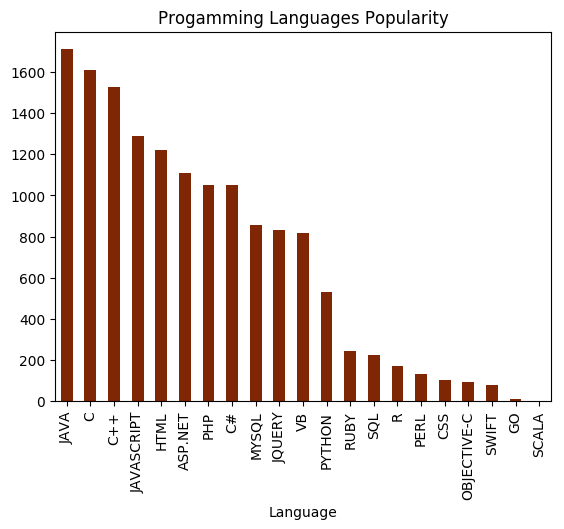

In [47]:
# Method-1

result_list = [(k,v) for (k,v) in all_result.items()]

df = pd.DataFrame(result_list)
df.columns = ['Language', 'Counts']
df = df.set_index(['Language'], drop=True)

# Sort dataframe
sort_df = df.sort_values(by="Counts", ascending=False)

# Plot chart
plt.figure(figsize=(100,100))
sort_df.plot(kind='bar', title='Progamming Languages Popularity', fontsize=10, legend=False, colormap='Oranges_r')
print(sort_df)
plt.show()

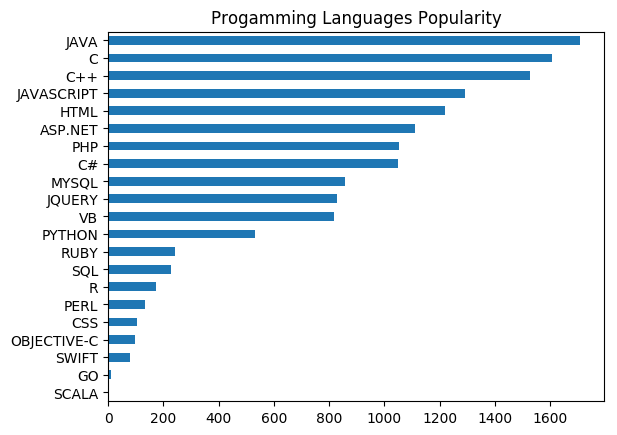

In [48]:
# Method-2

Languages = [key for key in all_result.keys()]
Counts = [value for value in all_result.values()]

df2 = pd.DataFrame(Counts, index=Languages, columns=['Counts'])
# df2 = pd.Series(Counts, index=pd.Series(Languages))    #Alternative way to create series

sort_df2 = df2.sort_values(by="Counts", ascending=True)

plt.figure(figsize=(100,100))
sort_df2.plot(kind='barh', title='Progamming Languages Popularity', fontsize=10, legend=False)
# print(sort_df2)
plt.show()

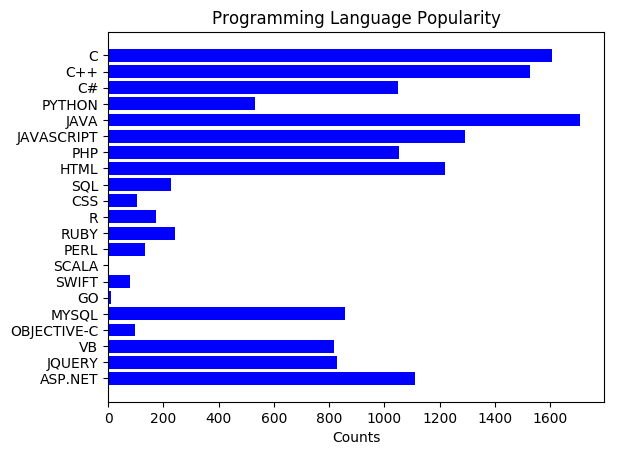

In [49]:
# Method-3
import matplotlib.pyplot as plt
import numpy as np

sorted_result = sorted(all_result.items(), key=lambda x:x[1], reverse=True)

Languages = [key for key in all_result.keys()]
Counts = [value for value in all_result.values()]

plt.rcdefaults()
fig, ax = plt.subplots()



lang = tuple(Languages)
y_pos = np.arange(len(Languages))
# error = np.random.rand(len(Languages))

ax.barh(y_pos, Counts, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(lang)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counts')
ax.set_title('Programming Language Popularity')

plt.show()